In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = "../data/data.csv"
# 파일 경로 입력

df = pd.read_csv(file_path)  
# CSV 파일 읽기

# 데이터 확인 (상위 5개 행 출력)
df.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14
0,자치구별(1),자치구별(2),전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,전체
1,자치구별(1),자치구별(2),소계,소계,소계,소계,소계,비사업용차량,비사업용차량,비사업용차량,비사업용차량,비사업용차량,사업용차량,사업용차량,사업용차량,사업용차량,사업용차량
2,자치구별(1),자치구별(2),계,승용차,승합차,화물차,특수차,계,승용차,승합차,화물차,특수차,계,승용차,승합차,화물차,특수차
3,전체,소계,37740685,29896258,1813153,5845215,186060,30537843,26202684,931310,3351547,52302,7202842,3693574,881843,2493667,133758
4,전체,종로구,557468,404004,42625,103260,7580,464195,384867,30634,47918,776,93273,19137,11991,55342,6804


In [2]:
# 데이터프레임의 상위 5개 행 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  29 non-null     object
 1   자치구별(2)  29 non-null     object
 2   2023     29 non-null     object
 3   2023.1   29 non-null     object
 4   2023.2   29 non-null     object
 5   2023.3   29 non-null     object
 6   2023.4   29 non-null     object
 7   2023.5   29 non-null     object
 8   2023.6   29 non-null     object
 9   2023.7   29 non-null     object
 10  2023.8   29 non-null     object
 11  2023.9   29 non-null     object
 12  2023.10  29 non-null     object
 13  2023.11  29 non-null     object
 14  2023.12  29 non-null     object
 15  2023.13  29 non-null     object
 16  2023.14  29 non-null     object
dtypes: object(17)
memory usage: 4.0+ KB


In [3]:
# 특정 세 자치구(예: 강남구, 종로구, 서초구) 데이터 필터링
df_filtered = df[df['자치구별(2)'].isin(['강남구', '종로구', '서초구'])]  
# 원하는 자치구만 선택

# 필요한 컬럼 선택 (2023년 1월~12월)
df_filtered = df_filtered[['자치구별(2)', '2023.1', '2023.2', '2023.3', '2023.4', '2023.5', '2023.6', 
                           '2023.7', '2023.8', '2023.9', '2023.10', '2023.11', '2023.12']]

df_filtered.columns = ['자치구', 'car_1', 'car_2', 'car_3', 'car_4', 'car_5', 'car_6', 
                       'car_7', 'car_8', 'car_9', 'car_10', 'car_11', 'car_12']

# 데이터 타입 변환 (문자 → 숫자)
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  
# 숫자로 변환 (문자열이 있으면 NaN 처리)

# 데이터 변형: 자치구 데이터를 개별적인 관측값으로 변환
data_list = []
for idx, row in df_filtered.iterrows():
    for col in df_filtered.columns[1:]:
        data_list.append([row['자치구'], row[col]])

df_long = pd.DataFrame(data_list, columns=['자치구', '승용차 이용 비율'])


In [4]:
df_long

,자치구,승용차 이용 비율
0,종로구,404004
1,종로구,42625
2,종로구,103260
3,종로구,7580
4,종로구,464195
5,종로구,384867
6,종로구,30634
7,종로구,47918
8,종로구,776
9,종로구,93273


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_10540\694161875.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


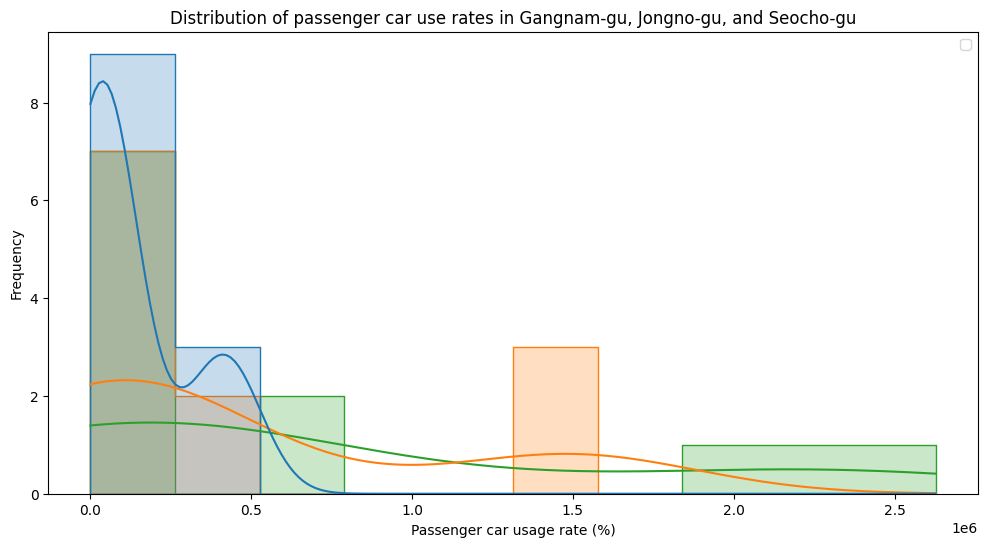

In [5]:
plt.figure(figsize=(12, 6))  
# 그래프 크기 설정

sns.histplot(data=df_long, x='승용차 이용 비율', hue='자치구', kde=True, bins=10, element='step', common_norm=False)  
# 히스토그램 및 KDE 그래프

plt.title('Distribution of passenger car use rates in Gangnam-gu, Jongno-gu, and Seocho-gu')  
plt.xlabel('Passenger car usage rate (%)')  
plt.ylabel('Frequency')  
plt.legend()  
plt.show()

In [6]:
# 정규성 검정 (Shapiro-Wilk test)
for region in ['강남구', '종로구', '서초구']:  
    # 검정할 자치구 리스트 입력
    stat, p = stats.shapiro(df_long[df_long['자치구'] == region]['승용차 이용 비율'].dropna())  
    # 정규성 검정 수행
    print(f"Shapiro-Wilk test ({region}): p-value = {p:.4f}")
    if p >= 0.05:
        print(f" → {region}의 데이터는 정규성을 만족합니다.")
    else:
        print(f" → {region}의 데이터는 정규성을 만족하지 않습니다.")

Shapiro-Wilk test (강남구): p-value = 0.0032
 → 강남구의 데이터는 정규성을 만족하지 않습니다.
Shapiro-Wilk test (종로구): p-value = 0.0014
 → 종로구의 데이터는 정규성을 만족하지 않습니다.
Shapiro-Wilk test (서초구): p-value = 0.0008
 → 서초구의 데이터는 정규성을 만족하지 않습니다.
